# Figure 1
This figure shows the multi-channel array-type DAS measurement, and compares an earthquake recording signal to the background noise level using sample data from the Fairbanks DAS Array and a co-located Trillium Posthole Compact 120s seismometer. The multi-channel DAS data are plotted as an image trace-by-trace, and as overlays of 10 channel stacks. In a second plot, this one in the Fourier Domain, the earthquake signal recorded on DAS is compared to the signal recorded on a seismometer at the site. Four minutes of data from the time of the earthquake record are used as the "signal". Four minutes of data following the earthquake record are used as the "noise".

Nate Lindsey 2017

In [8]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.figsize'] = 15, 6
import matplotlib.pyplot as plt
import obspy as obs
import numpy as np
import os
from splot import splot
import obspy

# Load the Seismometer data

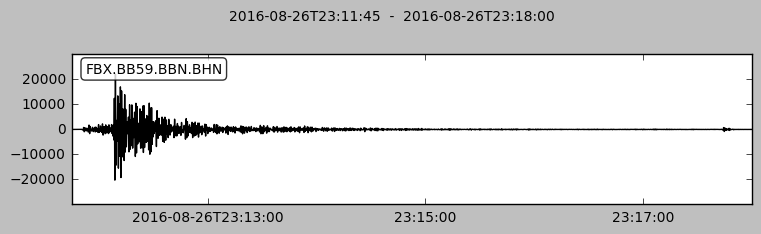

In [15]:
B = obspy.read('data/BBN.BHN.2016.239.23_IRR.sac')
B.trim(starttime=B[0].stats.starttime+11.75*60,endtime=B[0].stats.starttime+18*60)
B.detrend().taper(0.1).filter('bandpass',freqmin=0.5,freqmax=2,corners=4,zerophase=True)
B[0].plot()

# Load the DAS data

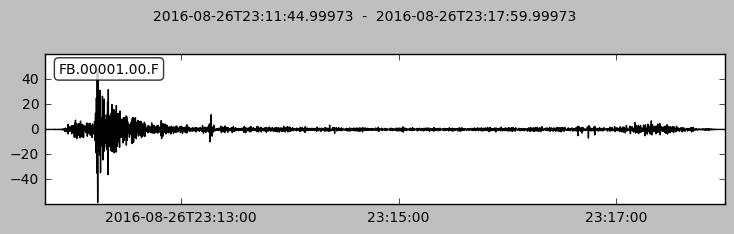

In [16]:
D = obspy.read('data/DAS.FBX.2016.08.26.23_earthquake.MSEED')
D.trim(starttime=B[0].stats.starttime,endtime=B[0].stats.endtime)
D.detrend().taper(0.1).filter('bandpass',freqmin=0.5,freqmax=3,corners=4,zerophase=True)
D[1].plot()

# Plot DAS Earthquake gather Image and stacks for DAS traces in line
Load data for 140 channels of continuous DAS data from 08/26/2016 stored in data/FIG1_data/DAS.FBX.2016.08.26.23_earthquake.MSEED.

In [95]:
# Calculate 10m channel stacks along the stream
traces=[]
for i in np.arange(0,len(D)-2,10):
    for jind,j in enumerate(range(10)):
        try:
            trace.data =+ D[j+i].data.copy()
        except:
            trace = D[i+j].copy()
    trace.data /= j
    traces.append(trace)
    del trace
stream = obspy.Stream(traces=traces)

In [96]:
# Convert the DAS stream of 160 1-m spaced channels to a numpy array
t = D[0].times()
DImage = np.zeros([len(D),D[0].stats.npts])
for i in range(len(D)):
    DImage[i]=D[i].data

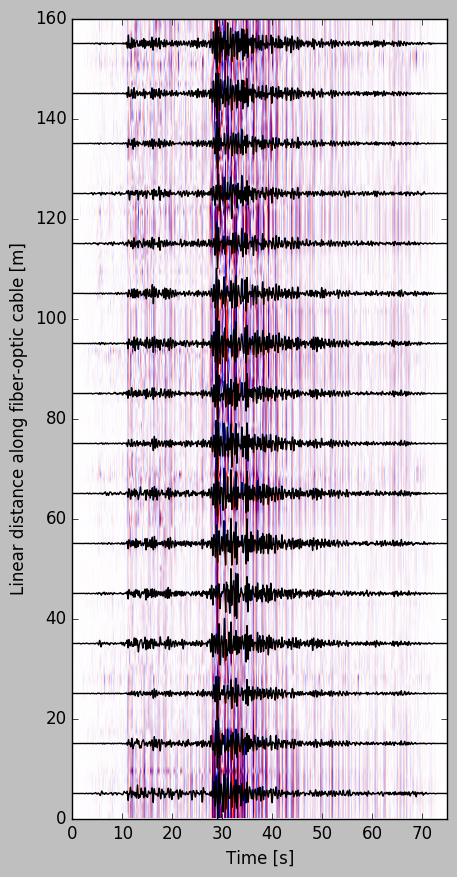

In [105]:
# Plot the image
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(DImage,extent=(0,75,0,160),vmin=-50,vmax=50,cmap='seismic')
# Overlay stacks on image
def plot_trace(data,c,ax,sep):
    ax.plot(data.times(),data.data+sep,color=c,lw=1)
    ax.grid()
    ax.set_xlabel('Time [seconds after %s]' % str(data.stats.starttime))
    ax.set_ylabel('Unscaled Amplitude [counts]')
    return ax
for itr,tr in enumerate(stream):
    sep = 10*itr+5
    tr.normalize()
    tr.data *= 5; # gain
    ax = plot_trace(tr,'k',ax,sep)
ax.set_xlim([0,75])
ax.set_ylabel('Linear distance along fiber-optic cable [m]')
ax.set_xlabel('Time [s]')
plt.savefig('FIG_1_gather.eps')

# Plot Frequency Content

In [29]:
#
B = obspy.read('data/BBN.BHN.2016.239.23_IRR.sac')
# B.trim(starttime=B[0].stats.starttime+11.75*60,endtime=B[0].stats.starttime+13*60)
B.trim(starttime=B[0].stats.starttime+11*60,endtime=B[0].stats.starttime+13*60)
B.detrend().taper(0.1).filter('bandpass',freqmin=0.05,freqmax=10,corners=4,zerophase=True)
D = obspy.read('data/DAS.FBX.2016.08.26.23_earthquake.MSEED')
D.trim(starttime=B[0].stats.starttime,endtime=B[0].stats.endtime)
D.detrend().taper(0.1).filter('bandpass',freqmin=0.05,freqmax=10,corners=4,zerophase=True)
traces=[]
for i in np.arange(0,len(D)-2,10):
    for jind,j in enumerate(range(10)):
        try:
            trace.data =+ D[j+i].data.copy()
        except:
            trace = D[i+j].copy()
    trace.data /= j
    traces.append(trace)
    del trace
stream = obspy.Stream(traces=traces)

tr1 = D[10]
fr1 = np.fft.rfft(tr1.data)
fs1 = np.fft.rfftfreq(tr1.stats.npts,d=tr1.stats.delta); # calc freqs
tr1a = stream[0]
fr1a = np.fft.rfft(tr1a.data)
fs1a = np.fft.rfftfreq(tr1a.stats.npts,d=tr1a.stats.delta); # calc freqs
tr2 = B[0]
fr2 = np.fft.rfft(tr2.data)
fs2 = np.fft.rfftfreq(tr2.stats.npts,d=tr2.stats.delta); # calc freqs2

#
B = obspy.read('data/BBN.BHN.2016.239.23_IRR.sac')
B.trim(starttime=B[0].stats.starttime+15.5*60,endtime=B[0].stats.starttime+17.5*60)
B.detrend().taper(0.1).filter('bandpass',freqmin=0.05,freqmax=10,corners=4,zerophase=True)
D = obspy.read('data/DAS.FBX.2016.08.26.23_earthquake.MSEED')
D.trim(starttime=B[0].stats.starttime,endtime=B[0].stats.endtime)
D.detrend().taper(0.1).filter('bandpass',freqmin=0.05,freqmax=10,corners=4,zerophase=True)
traces=[]
for i in np.arange(0,len(D)-2,10):
    for jind,j in enumerate(range(10)):
        try:
            trace.data =+ D[j+i].data.copy()
        except:
            trace = D[i+j].copy()
    trace.data /= j
    traces.append(trace)
    del trace
stream = obspy.Stream(traces=traces)
tr3 = D[10]
fr3 = np.fft.rfft(tr3.data)
fs3 = np.fft.rfftfreq(tr3.stats.npts,d=tr3.stats.delta); # calc freqs
tr3a = stream[0]
fr3a = np.fft.rfft(tr3a.data)
fs3a = np.fft.rfftfreq(tr3a.stats.npts,d=tr3a.stats.delta); # calc freqs
tr4 = B[0]
fr4 = np.fft.rfft(tr4.data)
fs4 = np.fft.rfftfreq(tr4.stats.npts,d=tr4.stats.delta); # calc freqs2

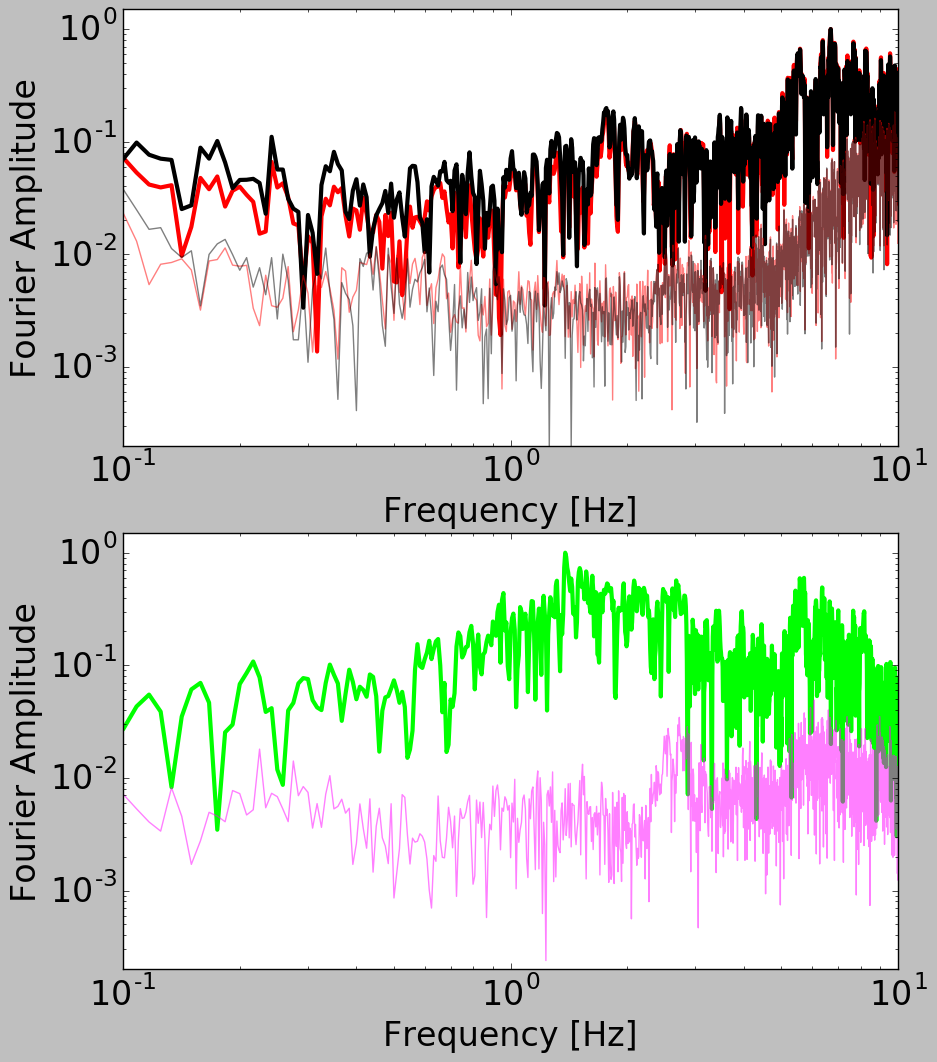

In [70]:
#
fig,ax = plt.subplots(2,1,figsize=(10,12))
ax[0].loglog(fs1,abs(fr1)/max(abs(fr1)),'r',lw=3,label='One DAS Channel')
ax[1].loglog(fs2,abs(fr2)/max(abs(fr2)),color='lime',lw=3,label='Seismometer')
ax[0].loglog(fs1a,abs(fr1a)/max(abs(fr1a)),'k',lw=3,label='10 DAS Channel Stack')
ax[0].loglog(fs3,abs(fr3)/max(abs(fr1)),'-',color='red',alpha=0.5)
ax[1].loglog(fs4,abs(fr4)/max(abs(fr2)),'-',color='magenta',alpha=0.5)
ax[0].loglog(fs3a,abs(fr3a)/max(abs(fr1a)),'-',color='k',alpha=0.5)
# ax[0].legend(loc='upper left',fontsize=20)
ax[0].set_xlim([0.1,10])
ax[1].set_xlim([0.1,10])
ax[0].set_ylim([2e-4,1.5])
ax[1].set_ylim([2e-4,1.5])
ax[0].set_xlabel('Frequency [Hz]',fontsize=24)
ax[1].set_xlabel('Frequency [Hz]',fontsize=24)
ax[0].set_ylabel('Fourier Amplitude')
ax[1].set_ylabel('Fourier Amplitude')
# ax[1].grid()
# ax[0].grid()
font = {'size'   : 24}
plt.rc('font', **font)
# plt.tight_layout()
# ax[1].legend(loc='upper left',fontsize=20)
plt.savefig('FIG_1_Freq.eps')